## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Loan_default.csv")

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

## DATA CLEANING
### Checking Missing values

In [7]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

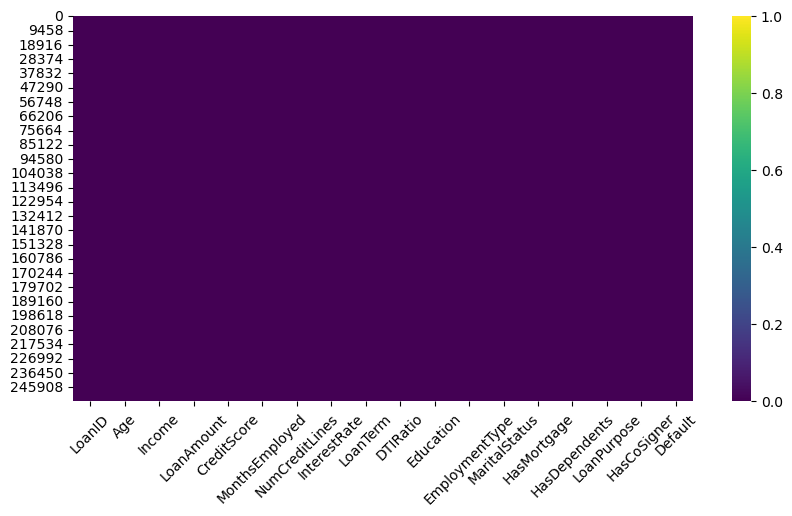

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data = data.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.xticks(rotation = 45)
plt.show();

In [9]:
# Drop irrelevant column
data.drop("LoanID", axis=1, inplace=True)
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# EDA
## Numerical Data

In [10]:
num_data = data.select_dtypes(exclude = "object")
num_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


In [11]:
# Numerical Column
num_column = num_data.columns
num_column

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

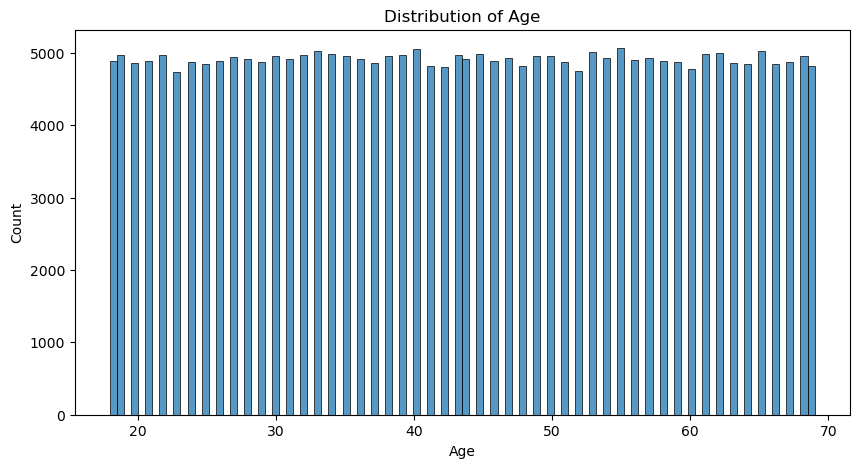

In [12]:
# Check the distribution of Age

plt.figure(figsize=(10,5))
sns.histplot(data = data["Age"], bins= 100)
plt.title("Distribution of Age");
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

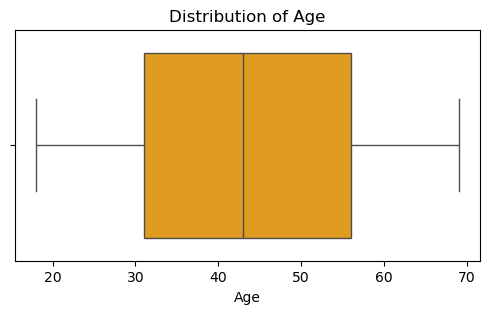

In [13]:
plt.figure(figsize=(6,3))
sns.boxplot(data = data["Age"], orient = 'h', color = "orange")
plt.title("Distribution of Age");
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

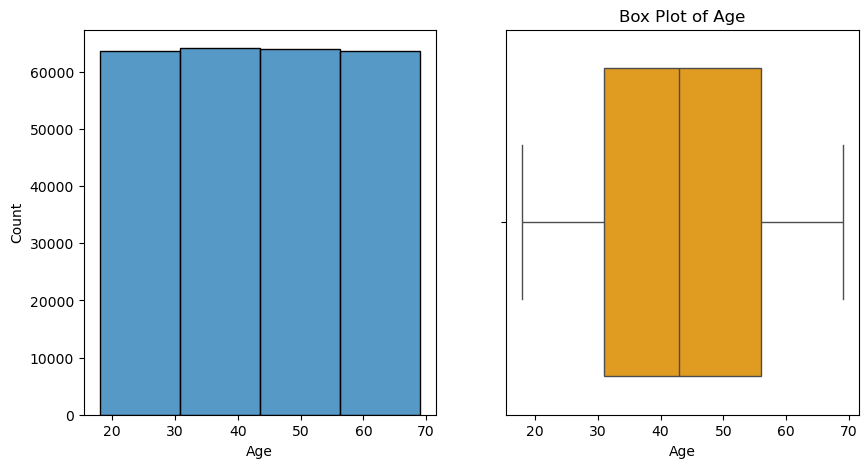

In [14]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(data = data["Age"], bins= 4, ax = axis [0])
plt.title("Distribution of Age");

sns.boxplot(data = data["Age"], orient = 'h', color = "orange", ax= axis[1])
plt.title("Box Plot of Age");

plt.show

## Bivariate Analysis

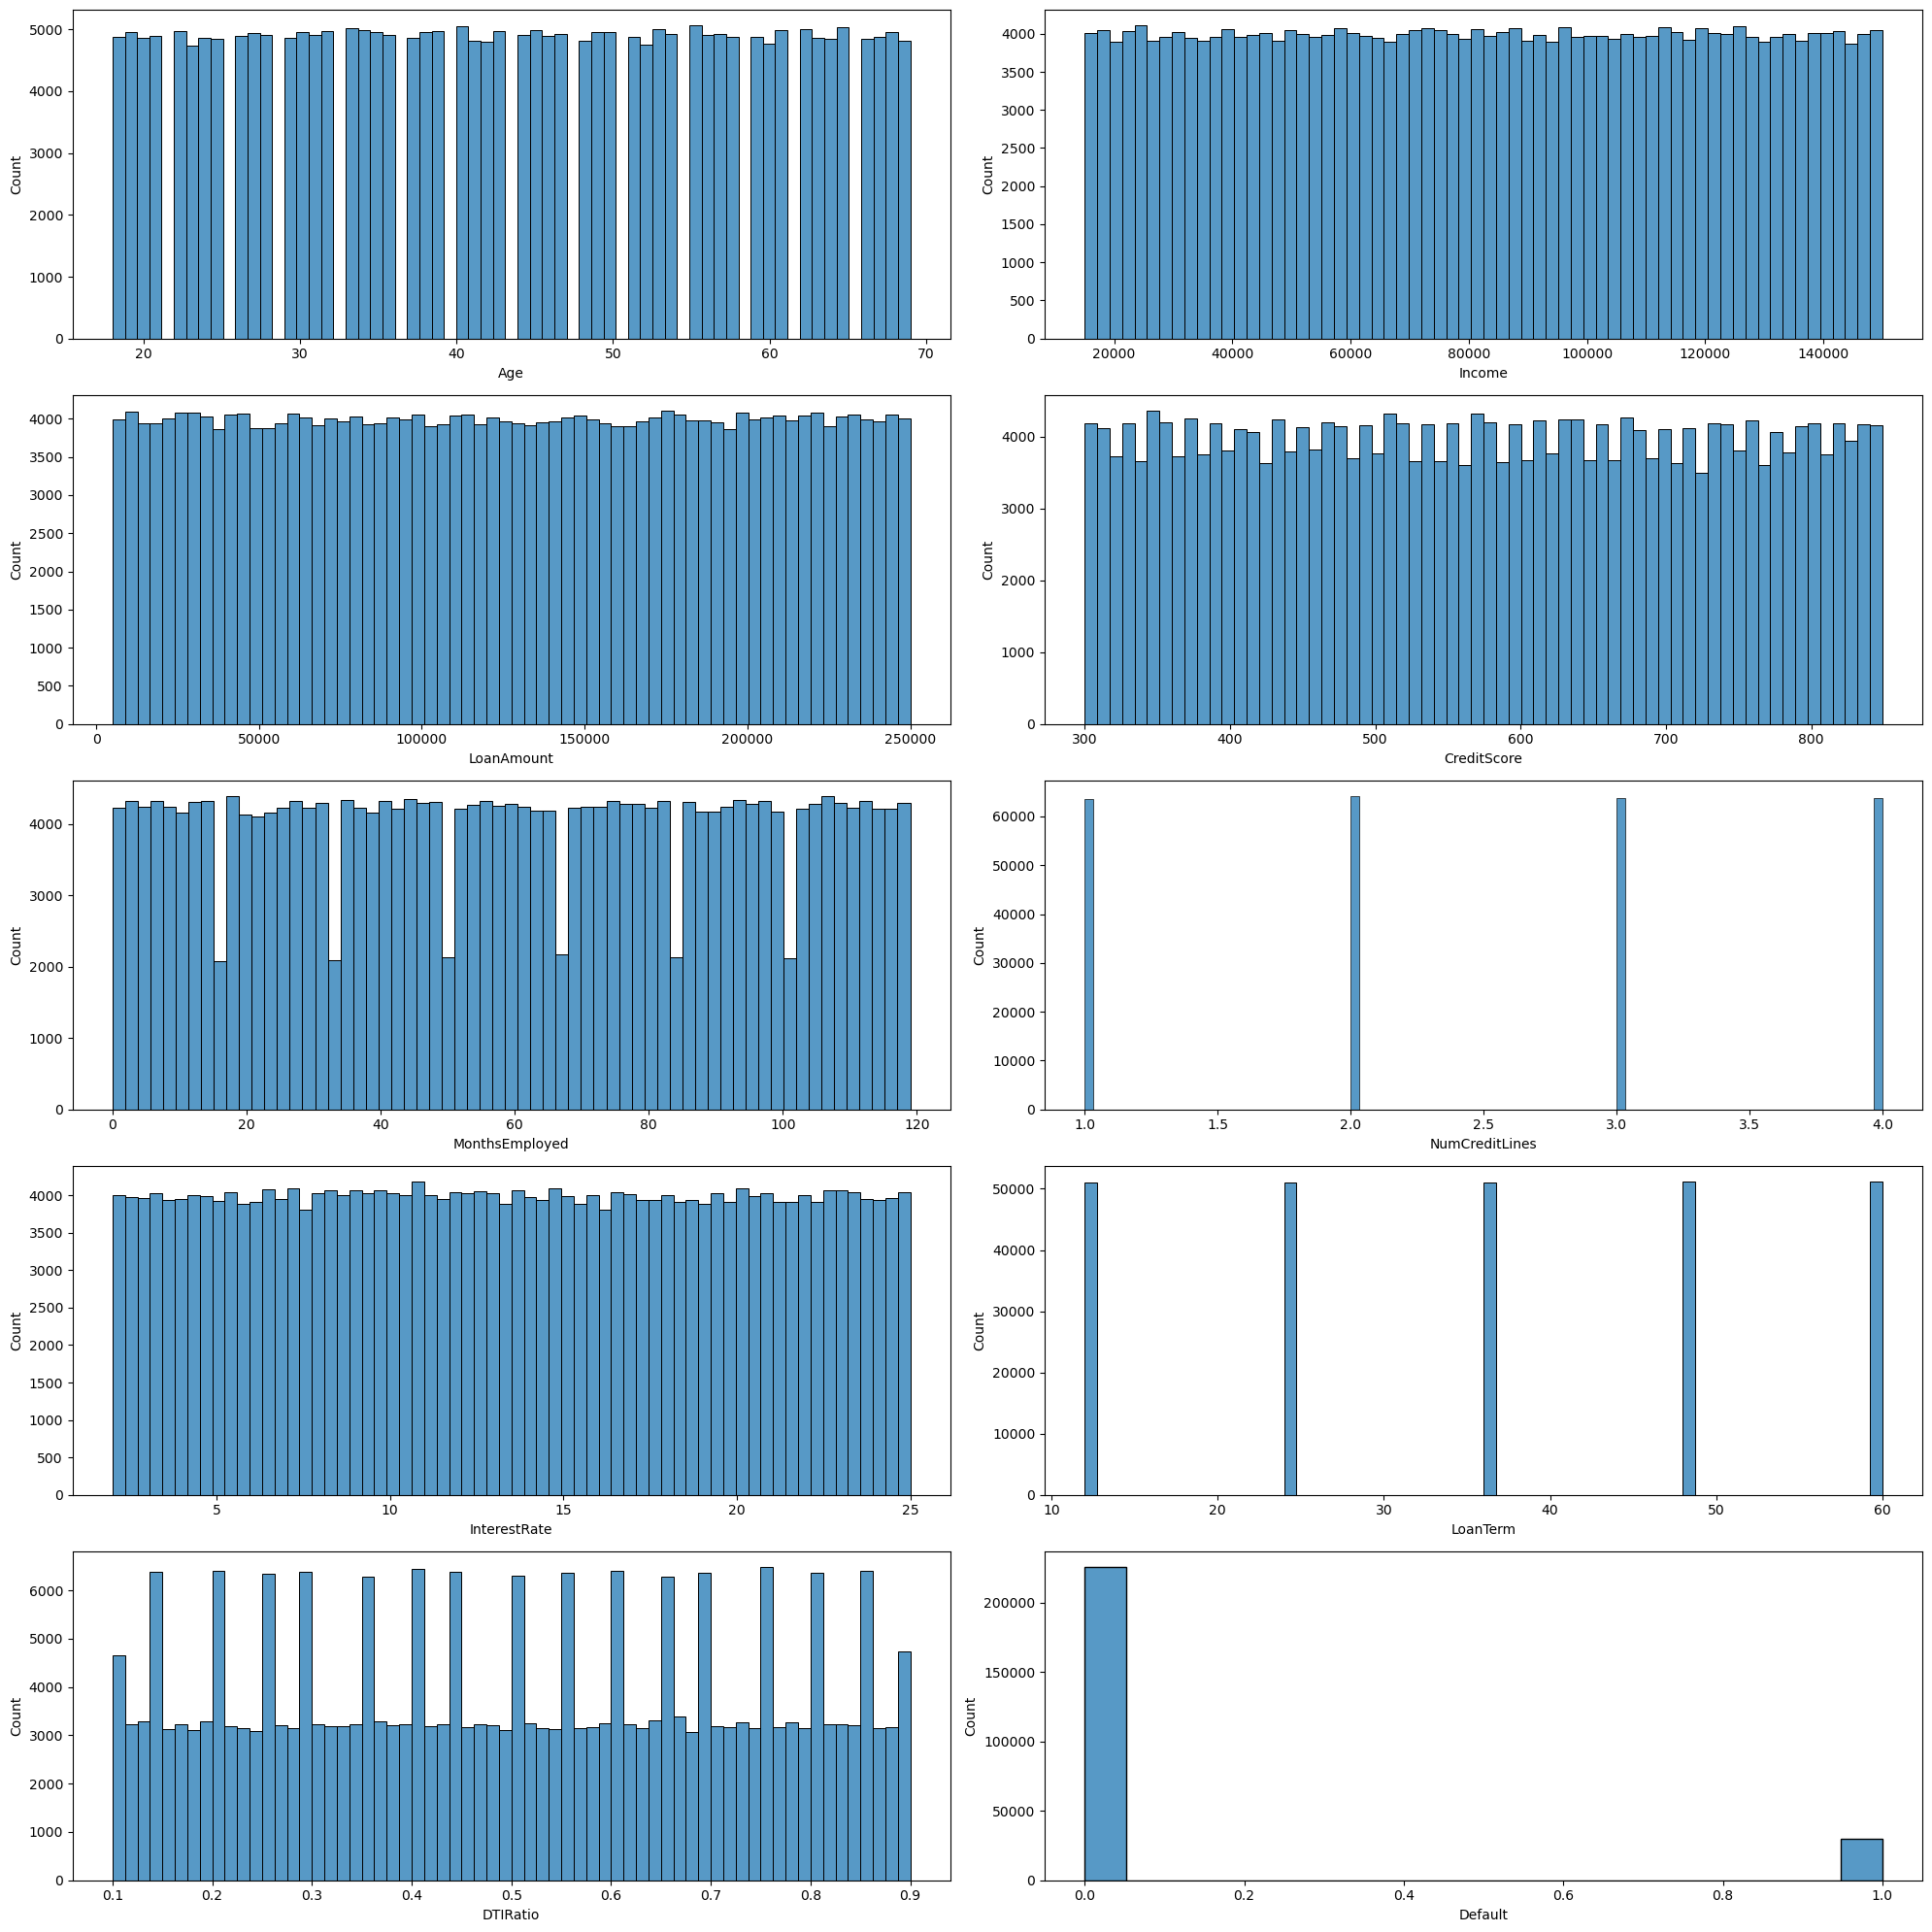

In [15]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
position  = axis.flatten()

for index, name_of_feature in enumerate(num_column):
    sns.histplot(x=data[name_of_feature], ax = position[index])
    
plt.tight_layout()

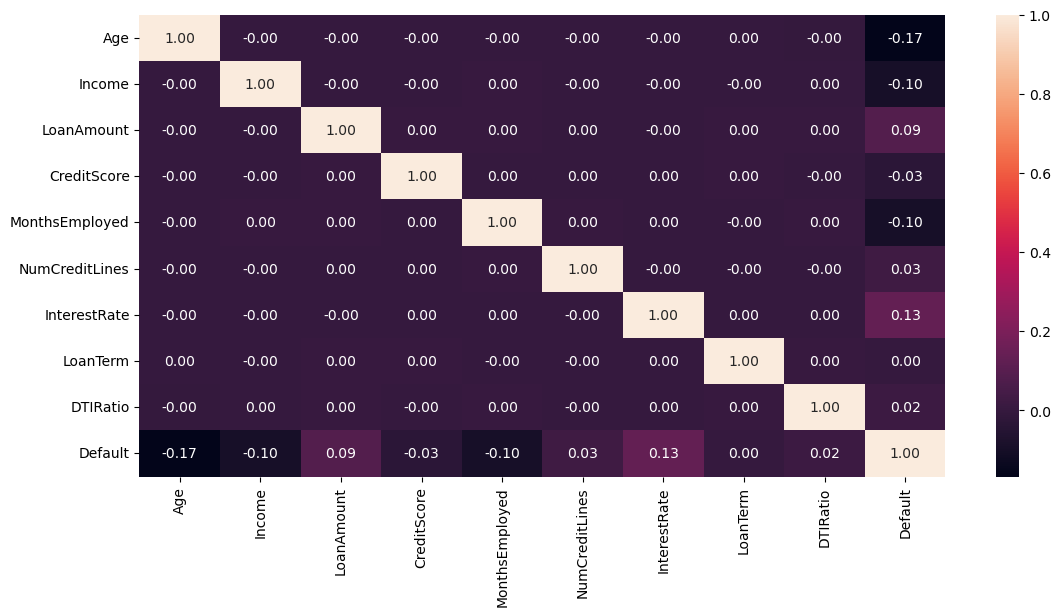

In [16]:
plt.figure(figsize = (13,6))
correlation_map = num_data.corr
sns.heatmap(correlation_map(), annot=True,  fmt = ".2f")
plt.show()

## Categorical Data

In [17]:
cat_data = data.select_dtypes(include = "object")
cat_data.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [18]:
# categorical Column
cat_column = cat_data.columns
cat_column

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [19]:
for feature in cat_column:
    print(f"{feature} -----------> {data[feature].nunique()}")

Education -----------> 4
EmploymentType -----------> 4
MaritalStatus -----------> 3
HasMortgage -----------> 2
HasDependents -----------> 2
LoanPurpose -----------> 5
HasCoSigner -----------> 2


## Univariate Analysis

In [20]:
edu_count = data["Education"].value_counts()
edu_count

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

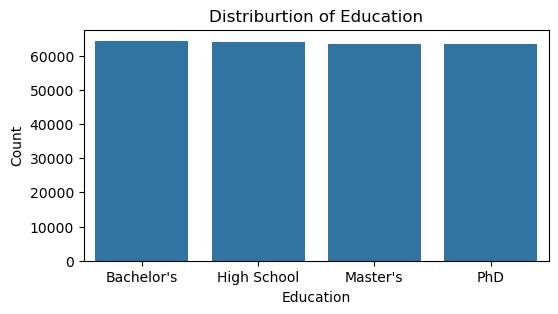

In [21]:
# Visualise the education distribution
plt.figure(figsize=(6,3))
sns.barplot(x = edu_count.index, y = edu_count.values);

plt.title("Distriburtion of Education")
plt.ylabel("Count")
plt.show

In [22]:
# Check the marital status distribution 
ms_count = data["MaritalStatus"].value_counts()
ms_count

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

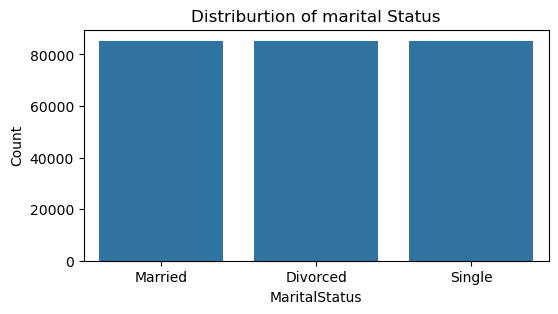

In [23]:
# Visualise the Marital status distribution 

plt.figure(figsize=(6,3))
sns.barplot(x = ms_count.index, y = ms_count.values);

plt.title("Distriburtion of marital Status")
plt.ylabel("Count")
plt.show

In [24]:
cat_column

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

# Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

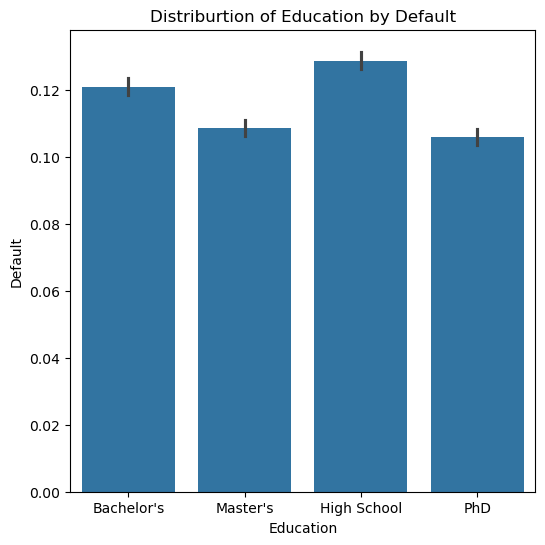

In [25]:
plt.figure(figsize=(6,6))
sns.barplot(x = data["Education"], y = data["Default"]);

plt.title("Distriburtion of Education by Default")
plt.ylabel("Default")
plt.show

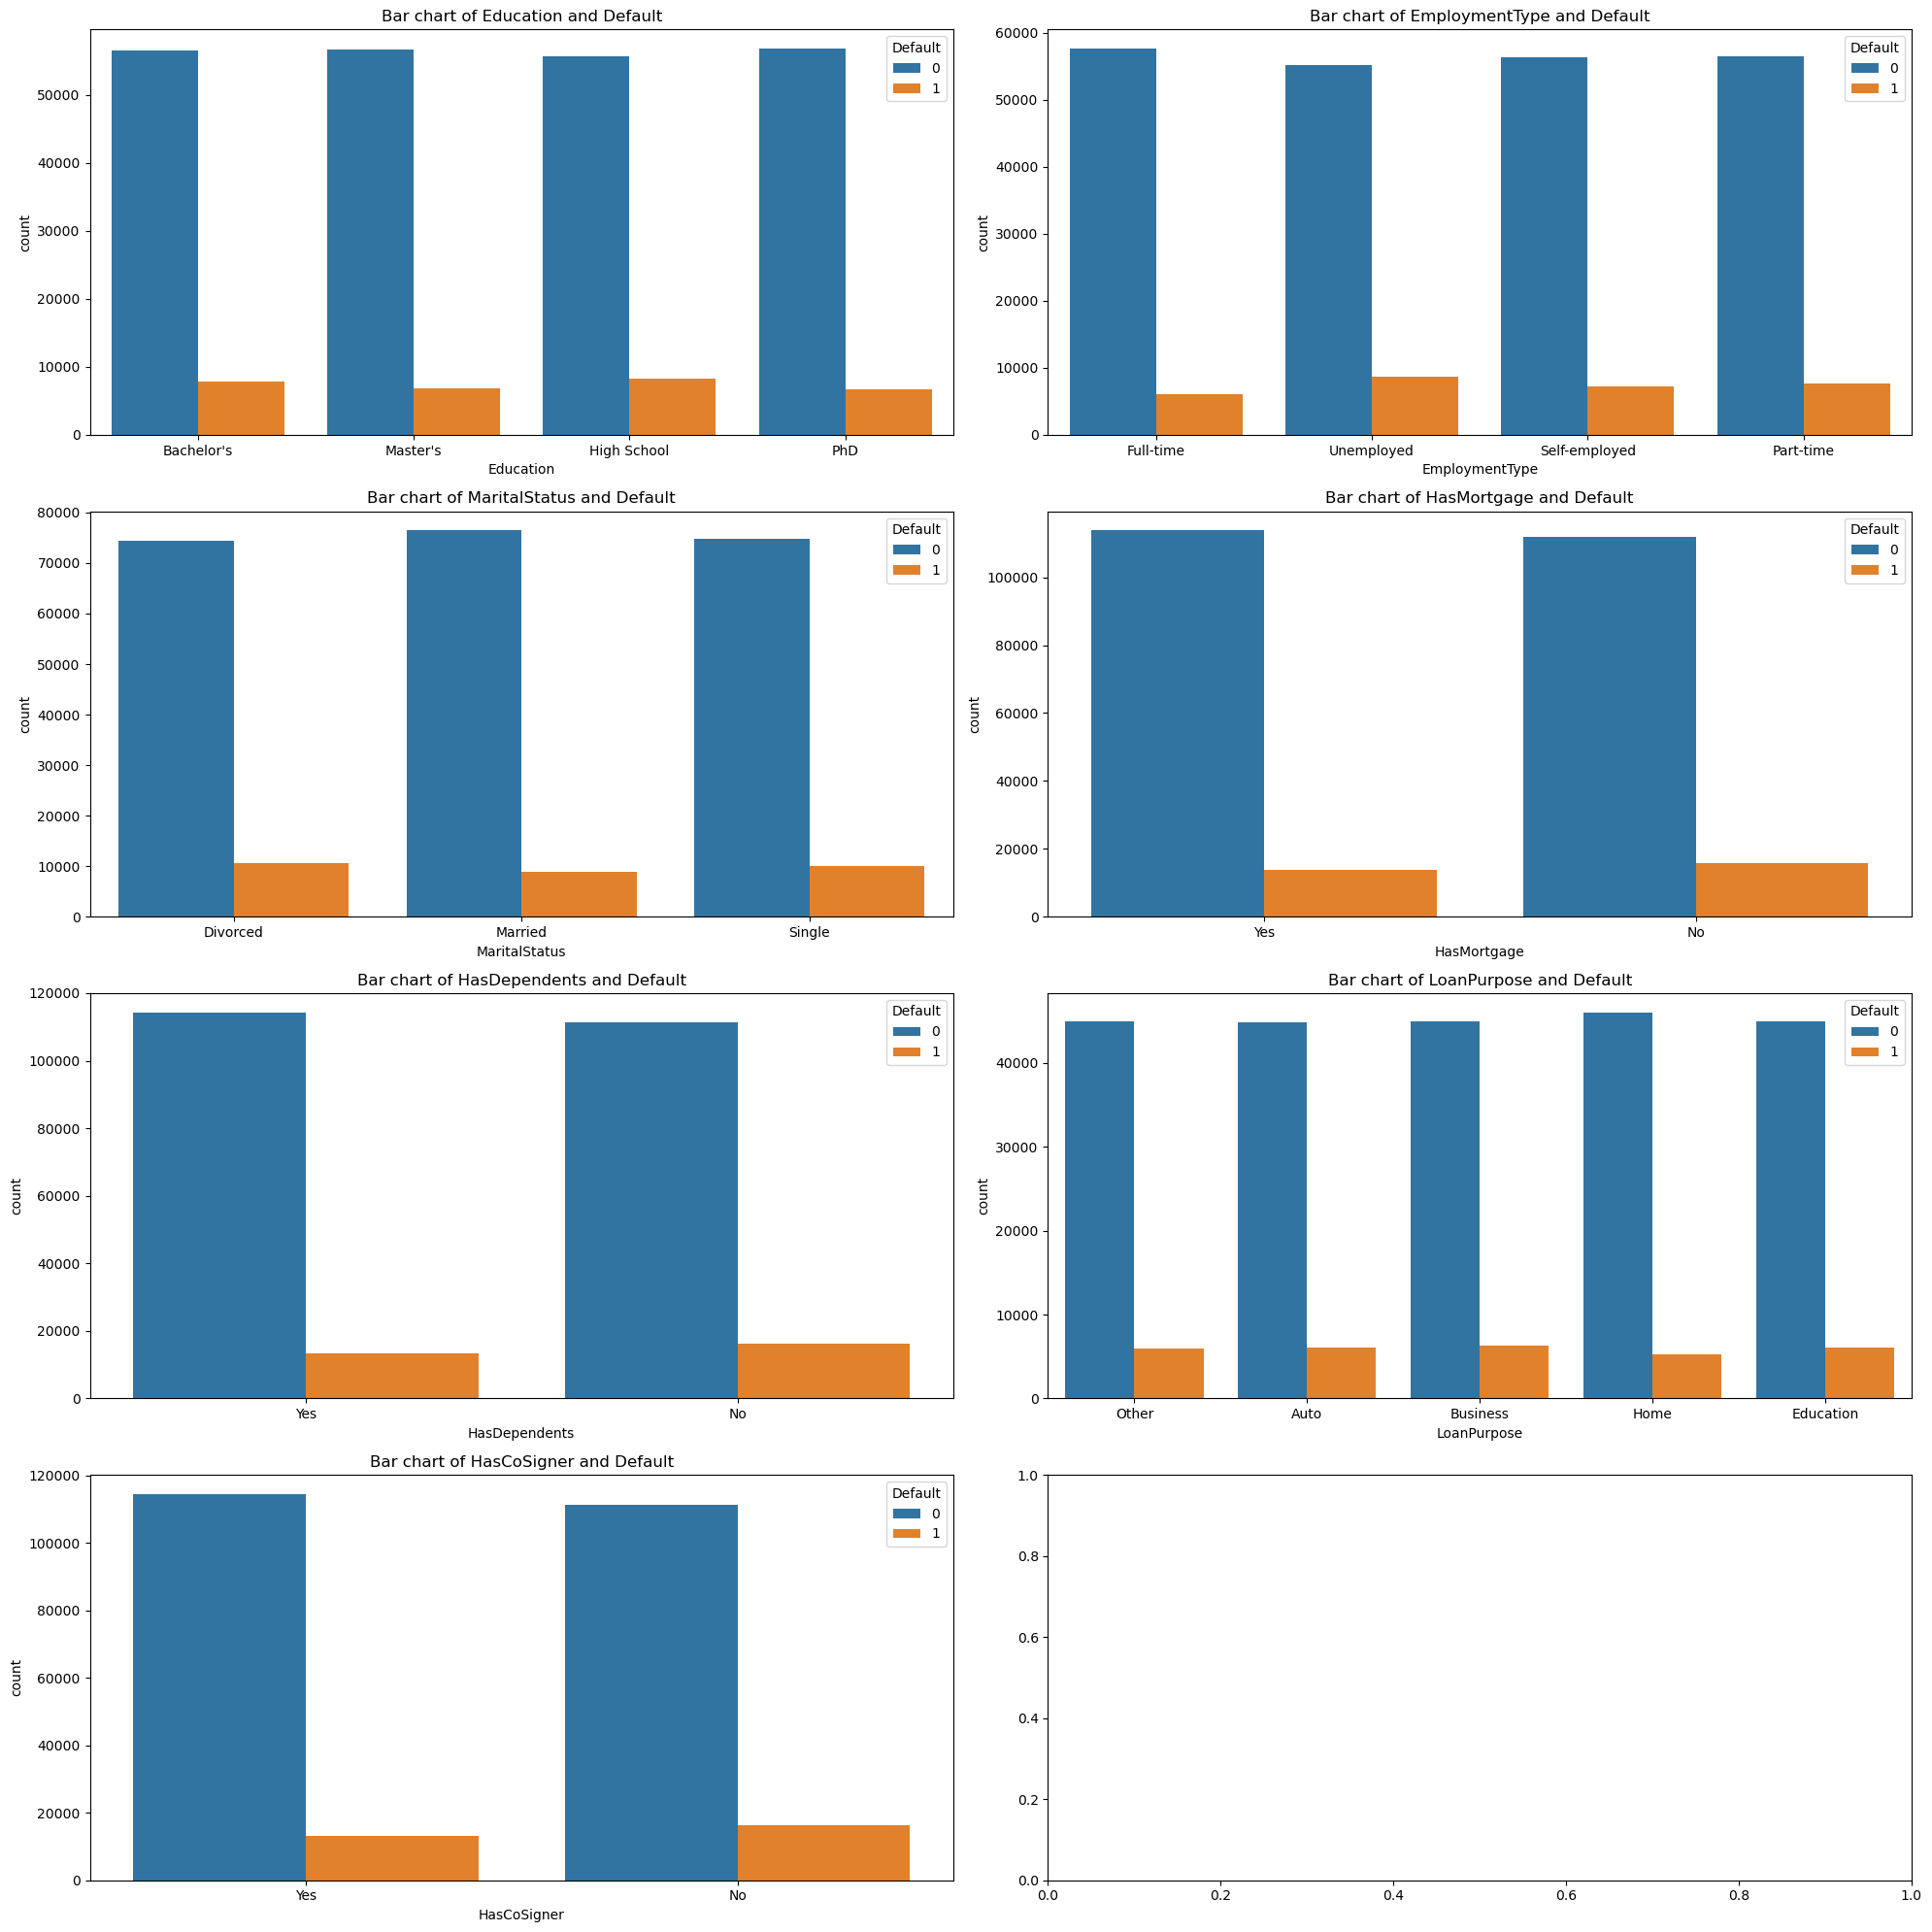

In [26]:
# Check the distribution of the categorical data

fig, axes = plt.subplots(nrows= 4, ncols= 2, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_column):
    sns.countplot(data = cat_data, x = feature, hue = data["Default"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Default")

plt.tight_layout()

## Modelling (Loan Default Prediction)

Data Pre-processing

In [27]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [28]:
# Extract the lebel from the features

label = data["Default"]
features = data.drop(["Default"], axis=1)

In [29]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


# Encoding categorical variables 
Using Label Encoding

In [30]:
# Convert all the categorical variable into numerical variable using Label encoding

cat_data.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [31]:
from sklearn.preprocessing import LabelEncoder

Two steps to encode any data:
1. fit
2. transform

In [32]:
# Create an instance of the encode
encoder = LabelEncoder()

In [33]:
encoder.fit(data["Education"])

LabelEncoder()

In [34]:
encoder.fit_transform(data["Education"])

array([0, 2, 2, ..., 1, 1, 0])

In [35]:
cat_column

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [36]:
for column_name in cat_column:
    features[column_name] = encoder.fit_transform(data[column_name])
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


## DATA SPLITING & FEATURE SCALING


In [37]:
print(f"Our data contain {len(features)} records before spliting")

Our data contain 255347 records before spliting


## Split the data into training and testing sets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


In [40]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [41]:
x_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1


In [42]:
len(x_train)==len(y_train)

True

## Model training

### We'll start with a logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
#Initialize the model
model = LogisticRegression(random_state=42)

In [45]:
# Train the model
model.fit(x_train, y_train)

C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [46]:
# make Predictions
predictions = model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

In [50]:
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.83      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.86      0.50      0.47     51070
weighted avg       0.88      0.88      0.83     51070



Text(0.5, 23.52222222222222, 'Actual Value')

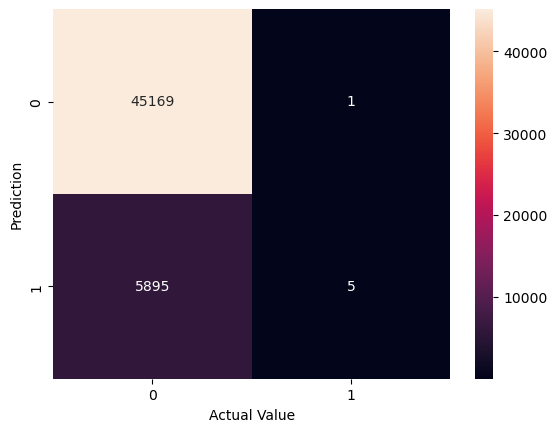

In [51]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

### Now let's experiment, and see how to improve the model performance

#### Now lets show the importance of data scaling
Because our data is has a uniform distribution, we'll use Min-Max Scaler.<br>
If the distribution is normal, we'll use a Standard Scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
#Initialise the scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

              precision    recall  f1-score   support

           0    0.88739   0.99754   0.93925     45170
           1    0.62116   0.03085   0.05878      5900

    accuracy                        0.88586     51070
   macro avg    0.75428   0.51420   0.49901     51070
weighted avg    0.85663   0.88586   0.83753     51070



Text(0.5, 23.52222222222222, 'Actual Value')

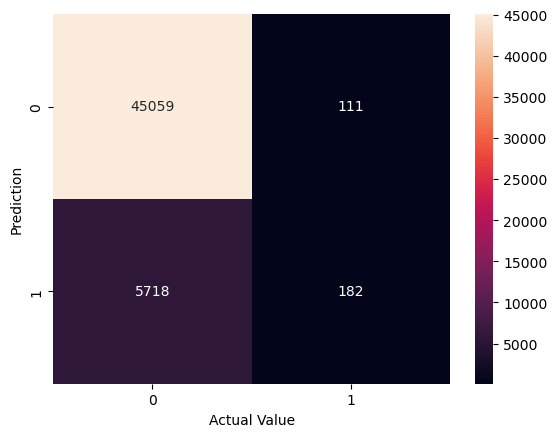

In [54]:
#Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(x_train_scaled, y_train)
# make Predictions
predictions = model.predict(x_test_scaled)
predictions
#Evaluation
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
#Plot the evaluation metrix
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

We can see the improvements in the class 1 predictions and slightly in the overall accuracy, precision, recall

Clearly the class imbalance is affecting the model's performance

### Can we do better ? 
Why don't we inform the model of our class imbalance and manually assign some class weight/importance to our weak class (class: `1`) ?

              precision    recall  f1-score   support

           0    0.92053   0.87366   0.89648     45170
           1    0.30402   0.42254   0.35362      5900

    accuracy                        0.82154     51070
   macro avg    0.61228   0.64810   0.62505     51070
weighted avg    0.84930   0.82154   0.83376     51070



Text(0.5, 23.52222222222222, 'Actual Value')

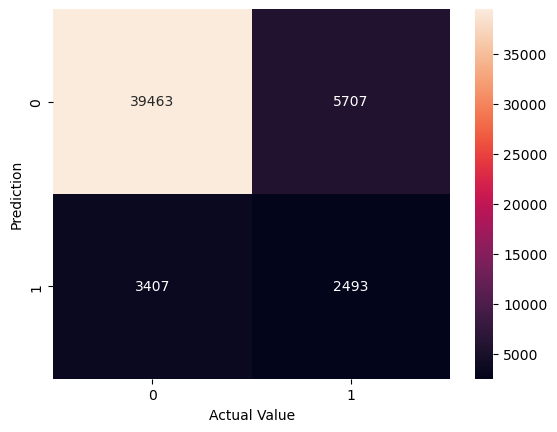

In [55]:
#Initialize the model
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
# Train the model
model.fit(x_train_scaled, y_train)
# make Predictions
predictions = model.predict(x_test_scaled)
predictions
#Evaluation
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
#Plot the evaluation metrix
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

### Is this the best we can achieve ? Why not try other classification models?

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90     45170
           1       0.30      0.42      0.35      5900

    accuracy                           0.82     51070
   macro avg       0.61      0.65      0.63     51070
weighted avg       0.85      0.82      0.83     51070



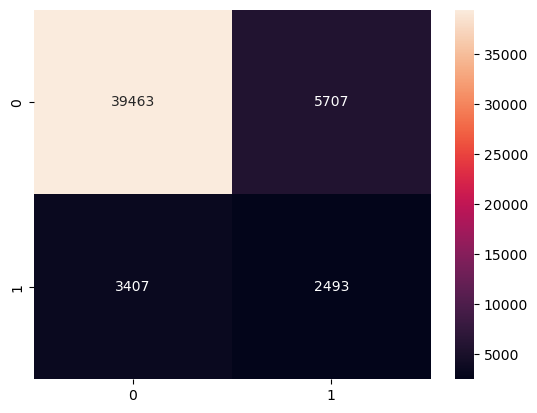

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     45170
           1       0.28      0.48      0.36      5900

    accuracy                           0.80     51070
   macro avg       0.60      0.66      0.62     51070
weighted avg       0.85      0.80      0.82     51070



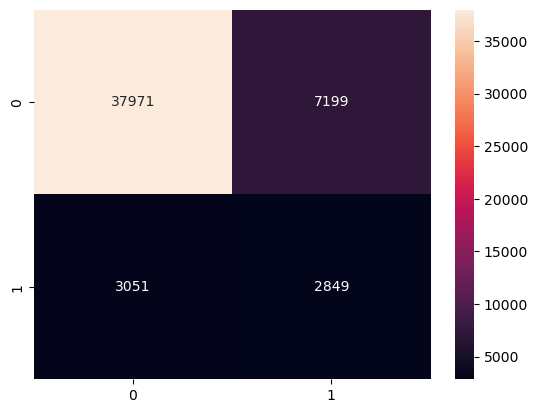

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     45170
           1       0.20      0.20      0.20      5900

    accuracy                           0.81     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.81      0.81      0.81     51070



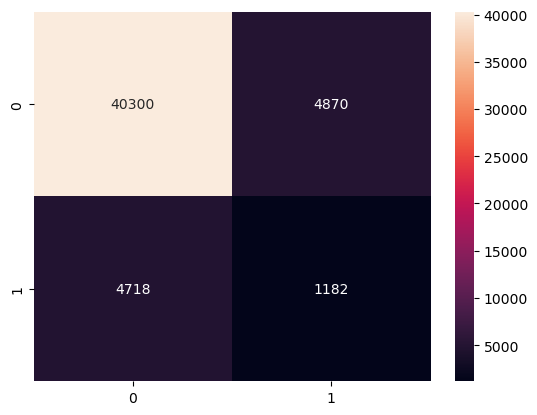

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



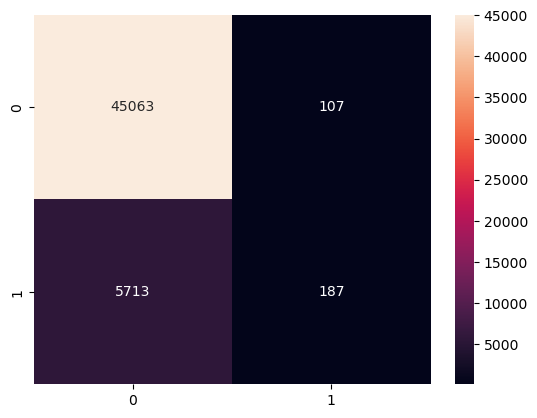

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


class_weights = {0: 1, 1: 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

### Do we actually need all these features? 
#### Why don't we slim down the model size by selecting the most IMPORTANT features and train with them ?

#### Feature Importance and Feature Selection

In [57]:
features.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0


In [58]:
classifiers[2] [0]

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [59]:
# Feature importance using Random Forest
importances = classifiers[2][0].feature_importances_
importances

array([0.11221571, 0.13892787, 0.1272474 , 0.10077027, 0.10203739,
       0.02508608, 0.13890597, 0.03176121, 0.08714361, 0.02467853,
       0.02667411, 0.01917951, 0.01263035, 0.01130258, 0.02995916,
       0.01148027])

In [60]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,Age,0.112216
1,Income,0.138928
2,LoanAmount,0.127247
3,CreditScore,0.100770
4,MonthsEmployed,0.102037
5,NumCreditLines,0.025086
6,InterestRate,0.138906
7,LoanTerm,0.031761
8,DTIRatio,0.087144
9,Education,0.024679


In [61]:
feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending=False)
feature_importance_df

,Feature,Importance
1,Income,0.138928
6,InterestRate,0.138906
2,LoanAmount,0.127247
0,Age,0.112216
4,MonthsEmployed,0.102037
3,CreditScore,0.100770
8,DTIRatio,0.087144
7,LoanTerm,0.031761
14,LoanPurpose,0.029959
10,EmploymentType,0.026674


<Axes: xlabel='Importance', ylabel='Feature'>

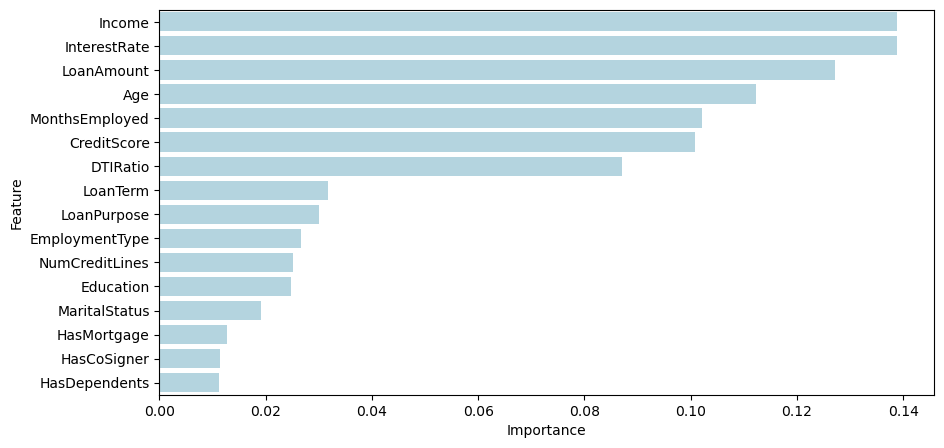

In [62]:
plt.figure(figsize= (10, 5))

sns.barplot(x="Importance", y="Feature", data=feature_importance_df, color="lightblue")